<a href="https://www.kaggle.com/code/aayaanhasnain/simple-mnist-nn-from-scratch-numpy-no-tf-keras?scriptVersionId=129394165" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Simple MNIST NN from scratch

In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

Here's a video which I referred for coding this : https://youtu.be/w8yWXqWQYmU

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000: m].T
Y_train = data_dev[0]
X_train = data_dev[1:n]
X_train = X_train / 255
_,m_train = X_train.shape

In [5]:
Y_train

array([8, 4, 0, 6, 6, 5, 3, 4, 3, 0, 5, 1, 0, 9, 2, 3, 2, 8, 7, 4, 2, 8,
       1, 5, 8, 9, 4, 5, 6, 1, 4, 2, 4, 9, 3, 1, 3, 8, 8, 1, 1, 2, 4, 3,
       3, 9, 9, 5, 8, 6, 0, 7, 9, 6, 4, 0, 2, 5, 4, 5, 6, 0, 7, 1, 8, 7,
       3, 9, 0, 2, 8, 9, 7, 4, 0, 9, 0, 7, 4, 0, 6, 2, 2, 6, 5, 9, 0, 7,
       6, 0, 7, 7, 8, 8, 2, 2, 0, 2, 4, 7, 8, 6, 8, 4, 3, 9, 3, 3, 0, 1,
       5, 1, 8, 0, 7, 7, 3, 2, 8, 0, 7, 6, 8, 7, 4, 0, 3, 1, 0, 3, 5, 9,
       7, 8, 0, 9, 0, 6, 9, 5, 1, 3, 9, 8, 8, 8, 1, 1, 4, 5, 7, 3, 1, 8,
       1, 7, 8, 1, 0, 3, 3, 2, 5, 7, 3, 1, 0, 7, 1, 2, 5, 6, 9, 5, 7, 2,
       8, 8, 7, 4, 4, 3, 2, 9, 9, 9, 5, 2, 1, 9, 2, 5, 9, 6, 8, 2, 5, 1,
       7, 9, 1, 1, 5, 1, 0, 9, 7, 2, 2, 9, 5, 6, 8, 5, 6, 4, 9, 0, 8, 3,
       1, 7, 8, 9, 2, 2, 9, 4, 3, 2, 2, 1, 7, 0, 7, 6, 0, 2, 9, 2, 2, 8,
       1, 2, 3, 1, 3, 7, 3, 2, 8, 9, 4, 8, 5, 4, 2, 8, 2, 2, 2, 2, 9, 3,
       5, 6, 6, 2, 2, 2, 8, 6, 2, 6, 1, 2, 3, 7, 8, 7, 1, 3, 7, 0, 7, 2,
       7, 1, 9, 2, 2, 5, 3, 5, 1, 9, 5, 1, 5, 6, 0,

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [6]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T) 
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y) / Y.size * 100

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1,dW2, db2 = backward_prop(Z1, A1, Z2, A2,W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if(i%5==0):
            print('Iteration : ',i)
            print('Accuracy : ', get_accuracy(get_predictions(A2),Y), "%")
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train,0.10 , 1000)

Iteration :  0
[1 1 1 8 1 1 1 7 1 7 1 1 1 1 1 1 1 1 8 7 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 8 1 1 1 1 1 1 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1
 8 0 1 1 1 1 1 8 1 1 1 8 1 1 1 1 1 1 1 1 1 1 8 7 1 1 1 1 1 1 1 1 6 8 1 1 1
 1 1 1 1 1 8 7 1 1 1 1 1 1 1 8 8 7 1 1 8 1 1 1 8 1 1 1 1 1 1 1 1 1 1 7 1 7
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 7 1 1 1 1 1 8 1 1 1
 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 7 1
 1 1 1 1 1 1 1 1 1 9 1 8 1 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 7 1 1 1 1 8 1 8 7 1 1 1 1 1 1 1 1 1 1 7 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1
 8 1 1 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 7 9 8 1 1 1 0 1 1 1 1 1 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 7 9 1 1 8 1 1 8 1 1 7 1 1 1 8 1 1 1 1 0 1 7 1 1 1 1 1 8 8
 1 1 1 8 1 1 1 8 1 1 1 1 1 1 1 1 1 7 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 0 8 1 1 6 1 1 1 1 1 1 6 1 1 1 1 1
 7 1 7 8 7

~94% accuracy on training set.

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [8]
Label:  8


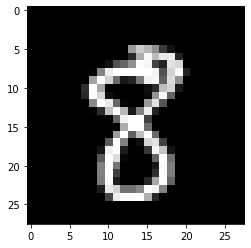

Prediction:  [4]
Label:  4


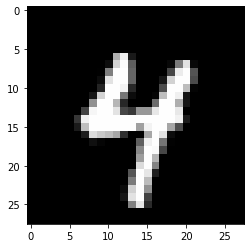

Prediction:  [0]
Label:  0


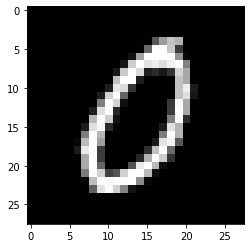

Prediction:  [0]
Label:  0


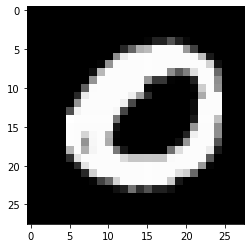

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 4 0 6 6 5 3 4 3 0 5 1 0 4 2 3 2 8 7 4 2 8 1 5 8 9 4 3 6 1 4 2 4 9 3 1 3
 8 8 1 1 2 4 3 3 9 9 5 8 6 0 7 9 6 4 0 2 5 4 5 6 0 7 1 8 7 3 9 0 2 8 9 7 4
 0 9 0 7 4 0 6 2 2 6 5 9 0 7 6 0 7 9 8 8 2 2 0 2 4 7 8 6 8 4 3 9 3 3 0 1 5
 1 8 0 7 7 3 2 8 0 7 6 8 7 4 0 3 1 0 3 5 9 7 8 0 9 0 6 9 5 1 3 9 1 8 3 1 1
 4 5 7 3 1 8 1 7 8 1 0 3 3 2 5 7 3 1 0 7 1 2 5 6 9 5 7 2 8 8 7 4 4 3 2 9 9
 9 5 2 1 9 2 8 9 6 8 2 5 1 7 9 1 1 5 1 0 9 7 2 2 9 5 6 8 5 6 4 9 0 8 3 2 7
 8 9 2 2 9 4 3 2 2 1 7 0 7 6 0 2 9 2 2 8 1 2 3 1 3 7 3 2 8 9 4 8 5 4 2 8 2
 2 2 2 9 5 8 6 6 2 2 2 8 6 2 6 1 2 3 7 8 7 1 3 7 0 7 2 7 1 9 2 2 5 3 9 1 9
 5 1 5 6 0 8 2 4 0 0 0 5 7 8 7 6 7 7 1 1 4 1 7 9 2 8 3 2 6 7 0 3 0 7 1 9 3
 1 1 1 0 6 8 7 6 7 3 3 4 0 3 1 8 1 1 5 5 9 8 5 1 3 9 4 5 4 9 7 4 7 2 1 2 0
 7 3 6 0 8 3 7 9 3 1 5 2 0 3 3 6 1 6 7 4 1 9 5 1 7 9 0 6 0 2 1 3 3 6 4 0 3
 8 8 6 3 8 7 4 0 4 2 9 3 7 0 2 1 8 9 6 1 0 2 8 9 8 4 3 9 3 8 4 4 9 4 9 8 5
 9 3 5 5 8 0 2 8 9 0 1 3 2 2 2 8 4 4 8 1 1 6 0 7 2 6 3 3 4 0 8 3 6 9 2 5 6
 2 6 9 4 1 3 9 1 9 2 1 8 

96.1

Still 94% accuracy, so our model generalized from the training data pretty well.